In [1]:
import pandas as pd
from tqdm  import tqdm
import os, glob, shutil
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
from IPython.display import Image
print("Setup Complete")

Setup Complete


## Validation space - 1
- Goes through all the txt files and checks for repetitive lines
- run on a folder containing a list of text files

In [5]:
import os

os.chdir('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/')
src_dir = 'images/H_Dataset_00/AGIH-VR-G2571-61103-panelized/txt'
src_dir = 'images/H_Dataset_02/txt'

flist = os.listdir(src_dir)

# Search repetitive lines   
if 0:
    for fname in tqdm(flist):
        fpath = os.path.join(src_dir, fname)
        with open(fpath, 'r') as f:
            data = f.readlines()

        for i, line in enumerate(data[:-1]):
            if line in data[i+1:]:
                print("[ERROR]: ",fname,"\t->\t", line)    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 245/245 [00:00<00:00, 9073.05it/s]


## Validation space - 2
- Dimension checker
- Read only

In [8]:
import os, cv2
import pandas as pd

    
os.chdir('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/')
src_dir = 'images/H_Dataset_02/txt'
img_dir = 'images/H_Dataset_02/img'

def dim_validator(df, msg ="Dimesion analysis complete!"):
    _temp = df[df['xmax']<df['xmin']]
    if (len(_temp)): print("df[df['xmax']<df['xmin']]",_temp)

    _temp = df[df['ymax']<df['ymin']]
    if (len(_temp)): print("df[df['ymax']<df['ymin']]",_temp)

    _temp = df[df['height']<df['ymin']]
    if (len(_temp)): print("df[df['height']<df['ymin']]\n",_temp)

    _temp = df[df['height']<df['ymax']]
    if (len(_temp)): print("df[df['height']<df['ymax']]\n",_temp)

    _temp = df[df['width']<df['xmin']]
    if (len(_temp)): print("df[df['width']<df['xmin']]\n",_temp)

    _temp = df[df['width']<df['xmax']]
    if (len(_temp)): print(" df[df['width']<df['xmax']]\n",_temp)

    if (len(df[df['width']< 1]) or len(df[df['height']<1])): print("Negative dimension")
    if (len(df[df['xmin']<  1]) or len(df[df['xmax']<1])): print("Negative dimension x")
    if (len(df[df['ymin']<  1]) or len(df[df['ymax']<1])): print("Negative dimension y")
    # print(msg)    
    


# Search repetitive lines   
if 0:
    flist = os.listdir(src_dir)
    columns_names= ['xmin', 'ymin', 'xmax', 'ymax', 'class']
    for fname in tqdm(flist):
        fpath = os.path.join(src_dir, fname)
        #img_path=os.path.join(img_dir, fname.replace('.txt','_8.jpg'))
        img_path=os.path.join(img_dir, fname.replace('.txt','.jpg'))
        if not os.path.exists(fpath):
            print("[ERROR]: Missing {}".format(fpath))
        if not os.path.exists(img_path):
            print("[ERROR]: Missing {}".format(img_path))
        img = cv2.imread(img_path)

        df = pd.read_csv(fpath, names=columns_names)
        df['height'], df['width'],_= img.shape
        dim_validator(df, msg ="Analysis complete for {}!\n".format(fname))



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 245/245 [00:06<00:00, 36.43it/s]


## Validation space - 3
- 1 Body per textfile

Scan of 245 files completed!


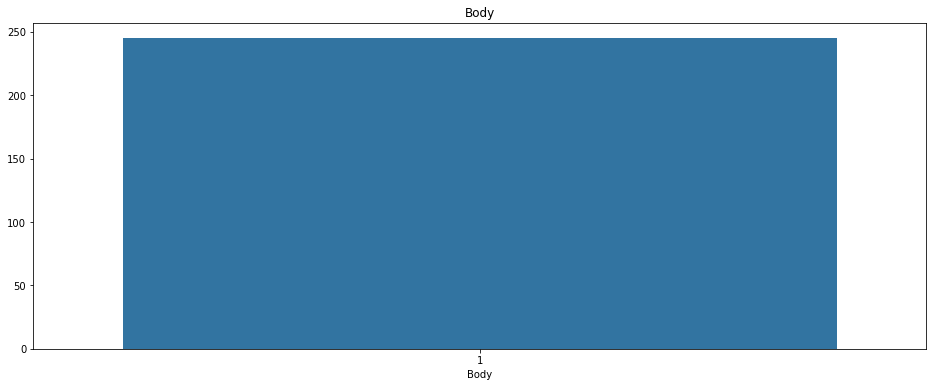

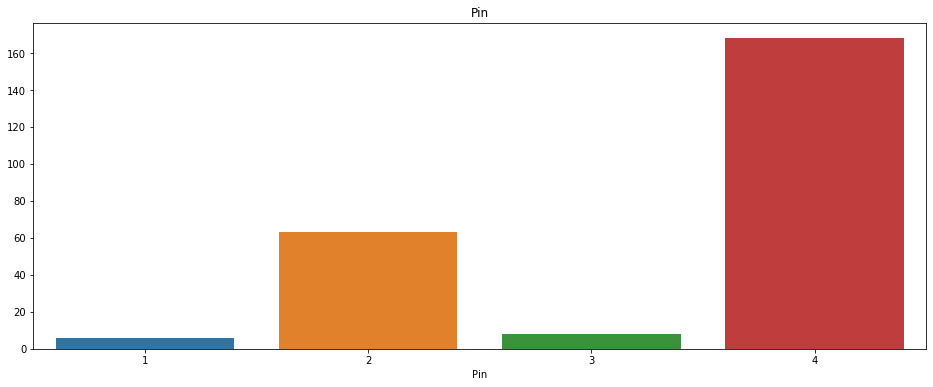

In [10]:
import os
import pandas as pd
from tqdm import tqdm
import seaborn as sns

os.chdir('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/')
body_count_list=[]
pin_count_list=[]

body_label=1
pin_label=0
body_label=0
pin_label=1

def isOneBodyLabel(lines):
    count = 0
    for line in lines:
        if (int(line.strip().split(',')[-1])== body_label): count = count + 1
            
    #  Return
    body_count_list.append(count)
    pin_count_list.append(len(lines)-count)
    if (count == 1): 
        return True, count
    else:
        return False, count
    
if 0:    
    # Txt files
    src_dir = 'images/H_Dataset_00/AGIH-VR-G2571-61103-panelized/txt'
    src_dir = 'images/H_Dataset_02/txt'
    flist = os.listdir(src_dir)
    for fname in flist:
        fpath = os.path.join(src_dir, fname)
        with open(fpath, 'r') as f:
            data = f.readlines()
            #print(fpath, data)

        flag, count = isOneBodyLabel(data)    
        if not (flag):
            print("[ERROR]\t {}: \tMultiple body {}".format(fname, count) )

    print("Scan of {} files completed!".format(len(flist)))


    body_count_df = pd.DataFrame({'Body': body_count_list})
    pin_count_df = pd.DataFrame({'Pin':  pin_count_list})

    plt.figure(figsize=(16,6))
    plt.title("Body")
    sns.barplot(x=body_count_df.groupby('Body').Body.count().index, y=body_count_df.groupby('Body').Body.count().values)
    plt.figure(figsize=(16,6))
    plt.title("Pin")
    sns.barplot(x=pin_count_df.groupby('Pin').Pin.count().index, y=pin_count_df.groupby('Pin').Pin.count().values)


## Generatation Train and test

In [13]:
# from  scripts.ShuffleAndSeparate import ShuffleAndSeparateToTrainTestSet as genDatasetCsv
from  scripts.ShuffleAndSeparate import SingleImageShuffleAndSeparateToTrainTestSet as genDatasetCsv

# Extraction
root_dir=r'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/AGIH-VR-G2571-61103-panelized'
root_dir=r'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_02'
root_dir=r'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_02/H_Dataset_02_PinOnly'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_04'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_05/gray'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_05/pintype'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_06'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_07/extracted/MERGED'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_08/H_Dataset_02_PinArray/QFP-Grayscale-ZL'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_08/H_Dataset_02_PinArray/SOIC-RGB/SOIC'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_08/H_Dataset_02_PinOnly/QFP+SOIC'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_08/H_Dataset_02_PinOnly/QFP+SOIC-Multiline'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_08/H_Dataset_02_PinOnly/QFP+SOIC-Fragmented'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_08/H_Dataset_02_PinOnly/Testcase-lt-600'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V01'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater'

genDatasetCsv(directory=root_dir, input_img_arg="img", input_txt_arg='txt', input_test_ratio=0.02)
print("Generation complete!")

Using default IMG_DIR = D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater\img
Using default txt_DIR = D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater\txt
Using default input_test_ratio = 0.02
[Processing] 1475 files are found in directory named txt
[Processing] 30 files in test set
[Processing] 1445 files in train_set
[Processing] Copying of test dataset
[Processing] Copying of train dataset
[Processing] Finish Process
Generation complete!


#### Remove PACKAGE___* from labels

In [4]:
import glob
import pandas as pd
import numpy as np
from tqdm  import tqdm

counter=0
for txt_file in tqdm(glob.glob("D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img/*.txt")):
    print("Analyse ", txt_file)
    with open(txt_file, 'r') as f:
        content = f.readlines()
        
    with open(txt_file, 'w') as f:
        for line in content:
            if (not ("PACKAGE___" in line)) and (not (line.strip() =="")): 
                f.write(line)
            else:
                counter =counter +1

print("Removed lines from {} files".format(counter))    

  8%|█████████████████▉                                                                                                                                                                                                  | 126/1490 [00:00<00:01, 1259.10it/s]

Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d86e31f3430c6e99d1f6.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d86e31f3430c6e99d2c2.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d86e31f3430c6e99d2c9.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d86e31f3430c6e99d2ca.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d86e31f3430c6e99d2cb.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d86e31f3430c6e99d2cc.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d86

 27%|█████████████████████████████████████████████████████████                                                                                                                                                           | 401/1490 [00:00<00:00, 1313.89it/s]

Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87731f3430c6e99fc38.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87731f3430c6e99fc39.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87731f3430c6e99fc3a.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87731f3430c6e99fc3b.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87731f3430c6e99fc3c.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87731f3430c6e99fc3d.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87

 46%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 679/1490 [00:00<00:00, 1351.16it/s]

 D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87931f3430c6e9a04f1.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87931f3430c6e9a04f2.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87931f3430c6e9a04f3.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87931f3430c6e9a04fe.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87931f3430c6e9a04ff.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87931f3430c6e9a0500.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87931f3430

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 961/1490 [00:00<00:00, 1380.88it/s]

 D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87e31f3430c6e9a1dc4.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87e31f3430c6e9a1dc5.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87e31f3430c6e9a1dc6.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87e31f3430c6e9a1dc7.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87e31f3430c6e9a1dc8.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87e31f3430c6e9a1dc9.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d87e31f3430

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 1242/1490 [00:00<00:00, 1393.01it/s]

D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88131f3430c6e9a2b2b.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88131f3430c6e9a2b31.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88131f3430c6e9a2b5c.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88131f3430c6e9a2b8d.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88131f3430c6e9a2b8e.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88131f3430c6e9a2b8f.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88131f3430c

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1490/1490 [00:01<00:00, 1379.93it/s]

 D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88531f3430c6e9a3c28.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88531f3430c6e9a3c29.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88531f3430c6e9a3c2a.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88531f3430c6e9a3c2c.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88531f3430c6e9a3c2d.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88531f3430c6e9a3c2e.txt
Analyse  D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/img\5e97d88531f3430

### Removing missing img's txt

D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a245f.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a2472.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a247e.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a249d.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a24bc.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a24ce.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a24cf.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a24db.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a24ed.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a24ee.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a24f8.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a24fa.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a250c.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a250d.jpg
D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw\5e97d88031f3430c6e9a252c.jpg


In [12]:
import glob, os
for txt_file in tqdm(glob.glob("D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_09/DB_09_V03/DB_Updater/raw/*.txt")):
    img_fname = txt_file.replace(".txt", ".jpg");
    if not (os.path.isfile(img_fname)):
        os.remove(txt_file)
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1490/1490 [00:00<00:00, 31019.57it/s]
